[[0.5, 0.0, 0.0, 0.3, 0.0, 0.3, 0.6000000000000001, 0.6000000000000001, 0.6, 0.0, 1.0, 0.3, 0.06666666666666667, 0.3, 0.06666666666666667, 0.0, 0.0, 0.5416666666666666, 0.5416666666666666, 1.0, 1.0, 0.6000000000000001, 0.5, 0.4, 0.0, 0.5, 0.0, 0.0, 0.55, 0.0, 0.0, 0.4, 0.55, 0.45454545454545453, 0.0, 0.0, 0.75, 0.4, 0.625, 0.75, 0.75, 0.75, 0.0, 0.45454545454545453, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.125, 1.0, 0.0, 0.0, 0.06666666666666667, 0.0, 1.0, 0.0, 0.375, 0.4, 0.6000000000000001, 0.3, 0.6000000000000001, 0.0, 0.8666666666666667, 0.0, 0.5, 0.45454545454545453, 0.45454545454545453, 0.75, 0.0, 0.9666666666666667, 0.6, 0.75, 0.0, 1.0, 0.65, 0.3, 1.0, 0.3, 0.3, 0.5, 0.4, 0.9, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.3, 0.6000000000000001, 1.0, 0.5, 0.9666666666666667, 0.0, 0.9, 1.0, 0.0, 0.0, 0.0, 0.6000000000000001, 1.0, 0.0, 0.5, 0.0, 0.6000000000000001, 0.0, 0.0, 0.0, 0.2, 0.6000000000000001, 0.75, 0.0, 0.0, 0.2, 0.75, 0.0, 0.6000000000000001, 0.6, 0.0,

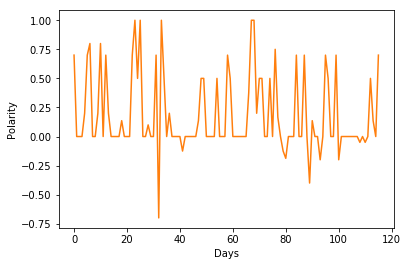

0
0


In [16]:

import xlrd
import openpyxl
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
from numpy import array
import string
from textblob import TextBlob

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from pandas import DataFrame
from pandas import ExcelWriter
from xlrd import open_workbook,cellname
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
loc = ("dictionary.xlsm")
result_adj=[]
count_pos =  0
count_neg =  0
count_neut =  0
i=0
b=0
list1=[]
individual_noun = ""
nouns=""
result=[]
result_adj=[]
listing1=[]
listing2=[]
listing3=[]
listing_pols=[]
list2=[]
polarities=""

wb = xlrd.open_workbook(loc)

values=[] #holds pos amd neg statements

with open('indeedreviews.txt', 'r') as myfile:
    data=myfile.read().replace('\n', '')
    
#print (data)
txt_tokenize = nltk.word_tokenize(data)

for element in txt_tokenize:
    if not element.isalpha():
        txt_tokenize.pop()
        break
    
#print(stripped)

sentiment_detect = nltk.pos_tag(txt_tokenize)

sentiments = [word for word,pos in sentiment_detect \
                                    if (pos == 'JJ' or pos == 'JJR' or pos=='JJS' or pos=='RB' or pos=='RBR' or pos=='RBS' )]
downcased = [x.lower() for x in sentiments ]
joined = " ".join(downcased)
result_adj.append(joined)
#print (sentiments)

# text blob code material


sid = SentimentIntensityAnalyzer()
for sentence in sentiments:
    b= TextBlob(sentence) 
    #b.sentiment.polarity
    #print(b.sentiment.polarity)
    result_adj.append(b.sentiment.polarity)
    result_sub.append(b.sentiment.subjectivity)
#print(result_adj[1:])

result1= result_sub[1:]
parts_sub=4
listing2= [result1[(j*len(result1))//parts_sub:((i+1)*len(result1))//parts_sub] for j in range(parts_sub)]
#print([result1[(j*len(result1))//parts_sub:((i+1)*len(result1))//parts_sub] for j in range(parts_sub)])

fig1= plt.figure(1)

y1= np.fromstring( str(listing2[1])[1:-1], dtype=np.float, sep=',' )
plt.ylabel('Subjectivity')
plt.plot(y1)






#fig2= plt.figure(2)
    
result = result_adj[1:]
#print(result)
    #df = pd.DataFrame(dict(ss=[]), dtype=float)
parts= 4
print([result[(i*len(result))//parts:((i+1)*len(result))//parts] for i in range(parts)])

listing1= [result[(i*len(result))//parts:((i+1)*len(result))//parts] for i in range(parts)]
y = np.fromstring( str(listing1[1])[1:-1], dtype=np.float, sep=',' )
plt.xlabel('Days')
plt.ylabel('Polarity')
plt.plot(y)
plt.show()





        
            
        #print('{0}: {1}, '.format(k, ss[k]), end='')
            
       # print()
  
    
#print('{0}: {1}, '.format(k, ss[k]), end='')
print(count_pos)
print(count_neg)
#print(result_adj[1:])


#result = result_adj[1:]
#parts= 4
#print([result[(i*len(result))//parts:((i+1)*len(result))//parts] for i in range(parts)])

In [25]:
from textblob import TextBlob

pos_count = 0
pos_correct = 0

with open("positive_train.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)
        if analysis.sentiment.polarity <= 0.8888:
            pos_correct += 1
        pos_count +=1


neg_count = 0
neg_correct = 0

with open("mixed_train.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)
        if analysis.sentiment.polarity <= 0.6655:
            neg_correct += 1
        neg_count +=1

print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))

print("Mixed sentiment accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

Positive accuracy = 95.9511077158136% via 1309 samples
Mixed sentiment accuracy = 91.59212880143113% via 1118 samples


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

pos_count = 0
pos_correct = 0

with open("positive_train.txt","r") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        if vs['compound'] > 0:
            pos_correct += 1
        pos_count +=1


neg_count = 0
neg_correct = 0

with open("mixed_train.txt","r") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        if vs['compound'] <= 0.66888:
            neg_correct += 1
        neg_count +=1

print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Mixed sentiment accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

Positive accuracy = 89.83957219251337% via 1309 samples
Mixed sentiment accuracy = 69.85688729874776% via 1118 samples


In [27]:
from textblob import TextBlob
mytext = "Work is excellent and employees are extremely loving, pay is excellent."
analyse = TextBlob(mytext)
print(analyse.sentiment.polarity)

0.8666666666666667
